# Otimização de tragetória a partir da tabela de custos calculada por A*

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

carregamento da tabela com os custos entre os pontos de interesse

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Carrega base da dados como Data Frame Pandas para verificação se a tabela está em formato adequado
import pandas as pd

tabela = pd.read_csv('/content/drive/MyDrive/E&Pcomp/monografia/matrizcustosN2.csv')
tabela.head()

,0,7.2426,29.627,34.284,66.811,90.74,110.02,135.41,132.37,160.41,146.17,115.2,139.71,135.05,126.74,131.98,125.81,131.54,147.1,109.4,99.497,112.81,70.598,91.154
0,7.2426,0.000,22.385,41.527,74.054,83.497,111.230,142.650,125.120,153.170,138.920,107.950,132.470,127.810,119.500,124.740,118.570,124.300,139.85,102.150,92.255,105.570,63.355,83.912
1,29.6270,22.385,0.000,21.971,61.669,77.255,104.880,130.270,118.880,146.920,132.680,101.710,126.230,121.570,113.250,118.500,112.330,119.470,135.02,97.326,87.426,100.740,60.770,77.669
2,34.2840,41.527,21.971,0.000,39.698,64.497,82.912,108.300,108.710,139.920,131.100,100.120,124.640,119.980,111.670,116.910,110.740,117.880,133.44,95.740,85.841,99.154,61.669,76.083
3,66.8110,74.054,61.669,39.698,0.000,49.770,60.770,68.598,86.569,101.150,114.120,104.810,118.300,128.710,120.400,125.640,124.440,131.580,147.14,109.440,99.539,112.850,94.882,83.397
4,90.7400,83.497,77.255,64.497,49.770,0.000,41.385,87.941,67.184,98.397,94.054,63.083,88.569,84.355,76.042,81.284,80.083,87.225,102.78,65.083,55.184,68.497,50.527,39.042


importando a tabela de custos no formato em que de fato será usada

In [5]:
import numpy as np
tabcustos=np.genfromtxt("/content/drive/MyDrive/E&Pcomp/monografia/matrizcustosN2.csv", delimiter=",", usemask=True)
a=tabcustos
ntabela=len(tabcustos)

### Declaração das funções auxiliares que devem conter as informações do problema

### Função de custo de cada volta 

#será usada a definição do python para indices > o primeiro é o ZERO

In [6]:
##MGMG tamanhoda tablela de custos
# tabcustos.shape[0]
npopulacao=ntabela #16 #16


In [7]:
#MGMG colocando aqui a função de custo 
# Função Objetivo


def CustoV(individual):
  contador=0
  custo=0
  for i in range(0,len(individual)-1):
  # for i in range(0,tabcustos.shape[0]-1):
  # for i in range(0,3-1):
    a1=individual[i]
    a2=individual[i+1]
    custo=custo+tabcustos[a1,a2]

    
  return custo,  


In [8]:
#MGMG gerando individuos validos apenas

def GeradorDeIndividuosValidos(icls, attr_bool_function):

  a=np.linspace(0,ntabela-1,ntabela)

  b=np.linspace(0,npopulacao-ntabela-1,npopulacao-ntabela)
  a=list(a)
  b=list(b)

  for i in range(0,len(b)):
    a.append(b[i])

  c = [int(i) for i in a]
  c

  random.shuffle(c)
  cromossomo=c
  return icls(cromossomo)




# Função para as restrições

In [9]:
# MG Função de restrição - neste caso - incentivar a passagem por todos os pontos - do modo como esta implementado não influencia no resultado final
# pode ser modificada para forçar uma sequência preferencial no meio da lista

def FuncaoDeRestricao(individual):

  a=np.linspace(0,ntabela-1,ntabela)
  a=list(a)

  c = [int(i) for i in a]
  ptosobrig=c[:]

  todos = True
  for el in ptosobrig:                
    if el not in individual:
      todos = False
      print("MG não atendeu a restrição")
      break
  
  return todos





In [10]:
# MG Função para cálculo da penalização proporcional ao número de pontos faltantes
def distance(individual):
  
  a=np.linspace(0,ntabela-1,ntabela)
  a=list(a)

  c = [int(i) for i in a]
  ptosobrig=c[:]

 
  faltam = 0
  for el in ptosobrig:                
    if el not in individual:
      faltam = faltam+1

  
  return faltam


### Declaração dos pacotes referentes a biblioteca do GA: 



In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [12]:
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 15)

toolbox.register("individual", GeradorDeIndividuosValidos, creator.Individual, toolbox.attr_bool) # MG aqui era o GeradorDeIndividuos

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", CustoV) 
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, distance))

toolbox.register("mate", tools.cxOrdered)  

toolbox.register("mutate", tools.mutShuffleIndexes,  indpb=0.15) 
toolbox.register("select", tools.selTournament, tournsize=4)  

# 1-) Modo compacto - ajustes nos parâmetros influenciam o desempenho e mudanças na tabela de entrada devem ser acompanhadas de ajustes nos parametros de AG

## Chamada efetiva do GA para resolução

In [13]:
pop = toolbox.population(n=100)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [14]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.15, ngen=50, stats=stats, halloffame=hof, verbose=True) 


gen	nevals	avg    	std    	min   	max    
0  	100   	1765.14	141.461	1446.8	2083.67
1  	81    	1654.38	119.777	1430  	1976.3 
2  	68    	1568.1 	119.976	1212.83	1868.94
3  	65    	1509.07	132.594	1212.83	1978.85
4  	78    	1463.38	122.367	1212.83	1871.5 
5  	76    	1403.3 	117.643	1063.11	1772.97
6  	78    	1385.15	158.762	1058.62	1837.55
7  	77    	1348   	156.886	1054.51	2043.51
8  	76    	1294.34	141.015	1036.44	1929.9 
9  	67    	1248.55	164.834	985.403	1806.76
10 	82    	1216.83	167.14 	950.81 	1729.33
11 	81    	1171.59	201.107	937.226	1771.6 
12 	88    	1131.07	172.242	926.154	1685.43
13 	72    	1069.99	136.661	920.497	1573.96
14 	77    	1075.84	163.192	920.497	1595.83
15 	83    	1053.14	169.93 	886.355	1714.39
16 	71    	1015.44	145.192	886.355	1646.15
17 	85    	1049.44	195.347	886.355	1809.77
18 	81    	1048.41	197.128	872.804	1822.49
19 	75    	994.983	180.089	872.804	1823.33
20 	73    	957.75 	169.571	872.804	1814.82
21 	66    	964.67 	181.853	872.804	1604.62
22 	78    	928

In [15]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
CustoV(hof[0])  #LucroTotal(hof[1])

Melhor Indivíduo:
[11, 12, 13, 14, 16, 19, 20, 23, 6, 5, 4, 2, 1, 0, 3, 17, 18, 10, 9, 7, 8, 15, 21, 22]
True
Melhor Resultado da Função Objetivo:


(863.0006,)

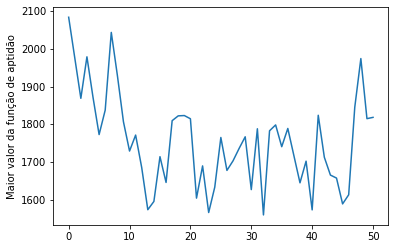

In [16]:
import matplotlib.pyplot as plt
gen, maxVal = log.select("gen", "max")
plt.plot(gen, maxVal)
plt.ylabel('Maior valor da função de aptidão')
plt.show()

# 2-) solução alternativa - ajustes nos parâmetros influenciam o desempenho e mudanças na tabela de entrada devem ser acompanhadas de ajustes nos parâmetros de AG

## Chamada efetiva do GA para resolução

In [17]:
population = toolbox.population(n=100) 
# quantidade de gerações
NGEN=20
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.15)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )




Geracao:  0
[[18, 19, 13, 0, 1, 2, 12, 20, 16, 14, 7, 15, 21, 17, 5, 6, 11, 10, 23, 9, 8, 3, 22, 4], [12, 9, 7, 6, 20, 14, 10, 18, 15, 1, 17, 21, 19, 16, 3, 5, 22, 0, 4, 23, 11, 8, 2, 13], [1, 3, 21, 6, 11, 8, 19, 16, 2, 13, 17, 18, 12, 15, 9, 23, 0, 4, 5, 22, 7, 20, 14, 10], [1, 2, 23, 0, 7, 15, 16, 12, 17, 5, 13, 21, 22, 4, 6, 8, 11, 10, 14, 3, 18, 19, 20, 9], [22, 7, 3, 1, 2, 4, 15, 6, 18, 20, 13, 23, 5, 10, 16, 14, 19, 17, 0, 8, 9, 11, 12, 21], [22, 16, 5, 14, 0, 2, 1, 11, 4, 3, 21, 7, 23, 15, 18, 6, 10, 19, 17, 12, 9, 8, 13, 20], [16, 17, 22, 6, 5, 20, 23, 7, 4, 1, 2, 9, 13, 18, 8, 0, 14, 21, 3, 19, 11, 15, 12, 10], [18, 7, 10, 5, 19, 12, 16, 22, 21, 14, 15, 11, 23, 1, 2, 3, 20, 6, 17, 9, 4, 13, 8, 0], [3, 0, 22, 18, 20, 6, 10, 8, 17, 16, 11, 4, 1, 7, 23, 2, 9, 14, 19, 5, 12, 21, 13, 15], [11, 8, 5, 2, 22, 9, 12, 20, 4, 14, 15, 6, 23, 1, 21, 18, 10, 7, 13, 17, 3, 0, 19, 16], [2, 0, 9, 20, 1, 5, 21, 11, 19, 15, 6, 14, 3, 23, 4, 8, 7, 16, 18, 17, 22, 12, 10, 13], [16, 7, 20, 15, 5, 

In [18]:
#MG codigo para testar individualmente alguma saída de intesse

melhor= [9, 11, 10, 12, 3, 2, 0, 1, 4, 5, 15, 14, 7, 6, 13, 8]     #[11, 0, 10, 6, 9, 13, 12, 8, 7, 1, 4, 14, 2, 15, 3, 5]
# melhor=[5, 13, 2, 4, 6, 1, 10, 8, 3, 0, 11, 0, 5, 7, 4, 1, 9, 2, 15, 12, 14, 3]

a=np.linspace(0,ntabela-1,ntabela)
a=list(a)
c = [int(i) for i in a]
ptosobrig=c[:]

faltam = 0
for el in ptosobrig:                #todo mundo da ptosobrig tem que estar na rota feita
  if el not in melhor:
    faltam = faltam+1

custou=CustoV(melhor)

print("faltam", faltam)
print("custou", custou)
# ptosobrig

faltam 8
custou (733.7374999999998,)


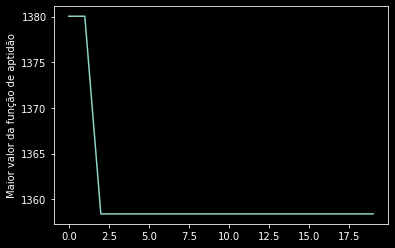

In [19]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()